# `Python ML project`
## `HSE GSB. Apartment price prediction`
### Contributors:
* [Daniil Gornin (MDI211)](https://github.com/dgornin)
* Karepin Evgeny (MDI211)
* Mukimova Yasmin (MDI211)
* Daria Sadova (MDI211)

> Note: if you want to install datasets with `kaggle API` then you will need to add your API key of kagle account to your `~/.kaggle/` folder, to get API key go to account settings and download `kaggle.json` from [account settings](https://www.kaggle.com/settings)

Download api key, put in folder of project and run this command:
```bash
mkdir ~/.kaggle/
cp kaggle.json ~/.kaggle/
chmod 600 ~/.kaggle/kaggle.json
```

### Contents:
- [EDA (exploratory data analysis) of the data](#eda-exploratory-data-analysis-of-the-data)
    - [Dataset download and unpack](#dataset-download-and-unpack)
    - [Addition and exploration of geo data](#addition-and-exploration-of-geo-data)
    - [Data exploration](#data-exploration)
    - [Analysis of continuous data](#analysis-of-continuous-data)
    - [Analysis of categorical data](#analysis-of-categorical-data)
    - [Analysis of data for revue and posable changes](#analysis-of-data-for-revue-and-posable-changes)
- [Gradient boosting](#gradient-boosting)
- [Linear regression model](#linear-regression-model)
- [Submit results](#submit-results)

### EDA (exploratory data analysis) of the data
#### Dataset download and unpack
Let's download data:

In [ ]:
! kaggle competitions download -c hse-gsb-apartment-price-prediction

Unpack data:

In [ ]:
import zipfile
path = './hse-gsb-apartment-price-prediction'
with zipfile.ZipFile('./hse-gsb-apartment-price-prediction.zip', 'r') as zip_ref:
    zip_ref.extractall(path)

In [ ]:
%ls $path

Import packages and read data:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("./hse-gsb-apartment-price-prediction/train.csv", delimiter=";")
df_test = pd.read_csv("./hse-gsb-apartment-price-prediction/test.csv", delimiter=";")
df_sample_submission = pd.read_csv("./hse-gsb-apartment-price-prediction/sample_submission.csv", delimiter=",")
df_train.head()

,ID,Категория,Заголовок,Опции продажи,Тип,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Кол-во этажей в доме,...,Кол-во совмещенных санузлов,Ремонт,Вид из окон,Расстояние до метро,Адрес,Описания,Стоимость,Актуальность,Изображения,Регион
0,16592911,Недвижимость в Москве/Продажа/Продажа 2-комнат...,"2-комн. квартира, 70.03 м2",Возможна ипотека,Новостройка,70.03,41.8,13.7,2,17,...,NaN,NaN,NaN,12 мин. на транспорте,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...",Продается просторная двухкомнатная квартира 70...,7073030,Опубликовано,https://cdn-p.cian.site/images/3/824/736/novos...,Москва
1,17242255,Недвижимость в Москве/Продажа/Продажа 3-комнат...,"3-комн. квартира, 76.47 м2",Возможна ипотека,Новостройка,76.47,43.4,11.2,11,17,...,NaN,NaN,Во двор,12 мин. на транспорте,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...","Продается трехкомнатная квартира 76,47 кв.м с ...",7799940,Опубликовано,https://cdn-p.cian.site/images2/5/690/176/novo...,Москва
2,193433104,Недвижимость в Москве/Продажа/Продажа 2-комнат...,"2-комн. квартира, 60.0 м2",NaN,Новостройка,60.00,38.0,12.0,5,20,...,NaN,NaN,На улицу и двор,3 мин. на транспорте,"Москва,СЗАО,район Хорошево-Мневники,3-я Хороше...",Дом сдан. Есть возможность перепланировать в 3...,11700000,Опубликовано,https://cdn-p.cian.site/images/5/002/116/novos...,Москва
3,140334219,Недвижимость в Москве/Продажа/Продажа 2-комнат...,"2-комн. квартира, 65.2 м2",Возможна ипотека,Новостройка,65.20,0.0,0.0,2,5,...,NaN,NaN,На улицу и двор,NaN,"Московская область,Красногорск городской округ...",Дом построен. Получена собственность. Фактичес...,6055000,Опубликовано,https://cdn-p.cian.site/images/4/379/115/novos...,Красногорск
4,189844059,Недвижимость в Москве/Продажа/Продажа 1-комнат...,"1-комн. квартира, 38.18 м2",Возможна ипотека,Новостройка,38.18,17.3,8.1,1,3,...,NaN,NaN,Во двор,33 мин. на транспорте,"Московская область,Истра городской округ,д. Ло...",Внимание! Вашему вниманию предлагается 1к квар...,2710780,Опубликовано,https://cdn-p.cian.site/images/7/107/141/novos...,Истра


Delate duplicates of data

In [3]:
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()
df_sample_submission = df_sample_submission.drop_duplicates()

#### Addition and exploration of geo data
Let's add geo data

In [4]:
train_address = df_train['Адрес'].unique()
test_address = df_test['Адрес'].unique()
test_regions = df_test['Регион'].unique()
regions = df_train['Регион'].unique()
len(train_address), len(regions)

(1776, 57)

In [5]:
len(test_address), len(test_regions)

(586, 33)

We have 1776 unique address, let's find coordinates of them

> Note: if you want to parse data about coordinates by yourself then you will need to use `Yandex API` to use it create `API key` here [crate api](https://yandex.ru/dev/maps/geocoder/?from=mapsapi) and then pass it to `Client function`

> Note: if you want you can use already parsed data from json file here [go to cell](#load-data-from-json)

##### Load data by your self

In [98]:
from yandex_geocoder import Client

adr_to_cord = {}
regions_cord = {}
t_adr_to_cord = {}
t_regions_cord = {}
client = Client("Yur API key")

In [ ]:
for i in range(0, len(train_address)):
    coordinates = client.coordinates(train_address[i])
    if coordinates:
        adr_to_cord[train_address[i]] = {"latitude": float(coordinates[1]), "longitude": float(coordinates[0])}
    else:
        adr_to_cord[train_address[i]] = {"latitude": None, "longitude": None}

In [101]:
for i in range(0, len(test_address)):
    coordinates = client.coordinates(test_address[i])
    if coordinates:
        t_adr_to_cord[test_address[i]] = {"latitude": float(coordinates[1]), "longitude": float(coordinates[0])}
    else:
        t_adr_to_cord[test_address[i]] = {"latitude": None, "longitude": None}

In [43]:
for i in regions:
    coordinates = client.coordinates(i)
    if coordinates:
        regions_cord[i] = {"latitude": float(coordinates[1]), "longitude": float(coordinates[0])}
    else:
        regions_cord[i] = {"latitude": None, "longitude": None}

In [102]:
for i in test_regions:
    coordinates = client.coordinates(i)
    if coordinates:
        t_regions_cord[i] = {"latitude": float(coordinates[1]), "longitude": float(coordinates[0])}
    else:
        t_regions_cord[i] = {"latitude": None, "longitude": None}

##### Load data from json

In [6]:
import json

with open('train_adr_to_cord.json', 'r') as fp:
    adr_to_cord = json.load(fp)

with open('regions_cord.json', 'r') as fp:
    regions_cord = json.load(fp)

with open('test_adr_to_cord.json', 'r') as fp:
    t_adr_to_cord = json.load(fp)

with open('test_regions_cord.json', 'r') as fp:
    t_regions_cord = json.load(fp)

In [7]:
lat = []
lon = []
for index, row in df_train.iterrows():
    lat.append(adr_to_cord[row['Адрес']]["latitude"])
    lon.append(adr_to_cord[row['Адрес']]["longitude"])

df_train['latitude'] = lat
df_train['longitude'] = lon

In [8]:
lat = []
lon = []
for index, row in df_test.iterrows():
    lat.append(t_adr_to_cord[row['Адрес']]["latitude"])
    lon.append(t_adr_to_cord[row['Адрес']]["longitude"])

df_test['latitude'] = lat
df_test['longitude'] = lon

Let's look at the data 

[Text(0.5, 1.0, 'Multiple bivariate KDE plot of distance')]

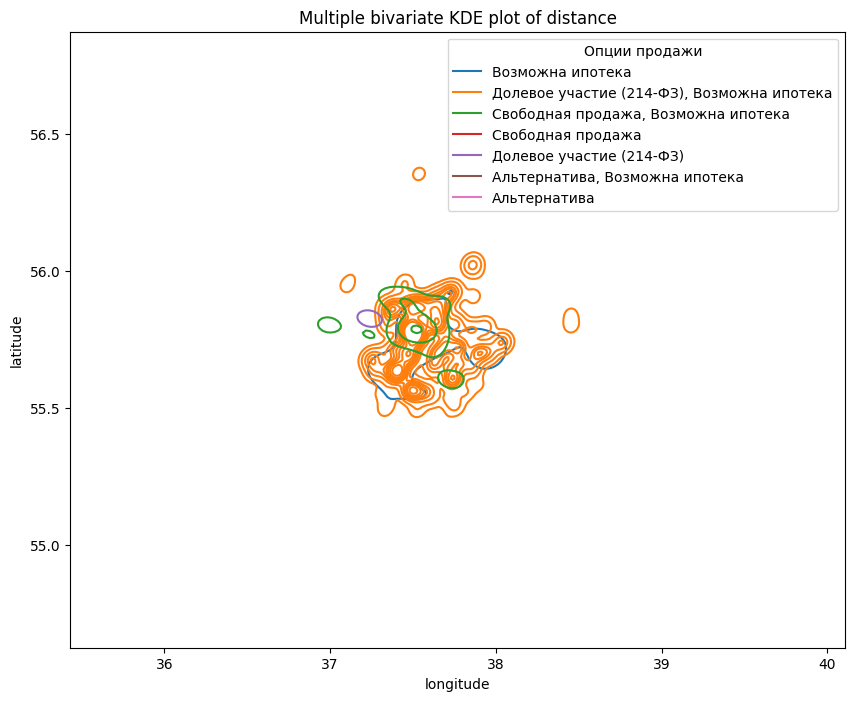

In [48]:
plt.figure(figsize=(10, 8))
sns.kdeplot(
    data=df_train,
    x="longitude",
    y="latitude",
    hue="Опции продажи",
    thresh=.1,
    legend=True,
).set(title="Multiple bivariate KDE plot of distance")

In [9]:
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
import plotly.express as px
from warnings import filterwarnings

def generateBaseMap(default_location=[55.7522, 37.6156], default_zoom_start=10):
        base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
        return base_map


base_map = generateBaseMap()
FastMarkerCluster(data=df_train[['latitude', 'longitude']].values.tolist()).add_to(base_map)
HeatMap(df_train[['latitude', 'longitude']], zoom=18, radius=15).add_to(base_map)
base_map

We can notice that all apt are placed in Moscow, or near it, so for model we can add range to Moscow center, and another range as range to local centr

In [10]:
def haversine_np(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [11]:
to_Moscow = []
to_LocalCentr = []
for index, row in df_train.iterrows():
    to_Moscow.append(haversine_np(row['longitude'], row['latitude'], 37.6156, 55.7522))
    to_LocalCentr.append(haversine_np(row['longitude'], row['latitude'], regions_cord[row['Регион']]['longitude'], regions_cord[row['Регион']]['latitude']))

df_train['to_Moscow'] = to_Moscow
df_train['to_LocalCentr'] = to_LocalCentr

In [12]:
to_Moscow = []
to_LocalCentr = []
for index, row in df_test.iterrows():
    to_Moscow.append(haversine_np(row['longitude'], row['latitude'], 37.6156, 55.7522))
    to_LocalCentr.append(haversine_np(row['longitude'], row['latitude'], t_regions_cord[row['Регион']]['longitude'], t_regions_cord[row['Регион']]['latitude']))

df_test['to_Moscow'] = to_Moscow
df_test['to_LocalCentr'] = to_LocalCentr

In [13]:
df_train.head()

,ID,Категория,Заголовок,Опции продажи,Тип,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Кол-во этажей в доме,...,Адрес,Описания,Стоимость,Актуальность,Изображения,Регион,latitude,longitude,to_Moscow,to_LocalCentr
0,16592911,Недвижимость в Москве/Продажа/Продажа 2-комнат...,"2-комн. квартира, 70.03 м2",Возможна ипотека,Новостройка,70.03,41.8,13.7,2,17,...,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...",Продается просторная двухкомнатная квартира 70...,7073030,Опубликовано,https://cdn-p.cian.site/images/3/824/736/novos...,Москва,55.511669,37.568488,26.891922,27.311201
1,17242255,Недвижимость в Москве/Продажа/Продажа 3-комнат...,"3-комн. квартира, 76.47 м2",Возможна ипотека,Новостройка,76.47,43.4,11.2,11,17,...,"Москва,НАО (Новомосковский),Щербинка,улица 40 ...","Продается трехкомнатная квартира 76,47 кв.м с ...",7799940,Опубликовано,https://cdn-p.cian.site/images2/5/690/176/novo...,Москва,55.511669,37.568488,26.891922,27.311201
2,193433104,Недвижимость в Москве/Продажа/Продажа 2-комнат...,"2-комн. квартира, 60.0 м2",NaN,Новостройка,60.00,38.0,12.0,5,20,...,"Москва,СЗАО,район Хорошево-Мневники,3-я Хороше...",Дом сдан. Есть возможность перепланировать в 3...,11700000,Опубликовано,https://cdn-p.cian.site/images/5/002/116/novos...,Москва,55.784724,37.496686,8.265630,8.216137
3,140334219,Недвижимость в Москве/Продажа/Продажа 2-комнат...,"2-комн. квартира, 65.2 м2",Возможна ипотека,Новостройка,65.20,0.0,0.0,2,5,...,"Московская область,Красногорск городской округ...",Дом построен. Получена собственность. Фактичес...,6055000,Опубликовано,https://cdn-p.cian.site/images/4/379/115/novos...,Красногорск,55.770856,37.243424,23.361804,8.613095
4,189844059,Недвижимость в Москве/Продажа/Продажа 1-комнат...,"1-комн. квартира, 38.18 м2",Возможна ипотека,Новостройка,38.18,17.3,8.1,1,3,...,"Московская область,Истра городской округ,д. Ло...",Внимание! Вашему вниманию предлагается 1к квар...,2710780,Опубликовано,https://cdn-p.cian.site/images/7/107/141/novos...,Истра,55.826468,37.115064,32.343430,18.732292


#### Data exploration

Let's look at the columns names

In [14]:
df_train.columns

Index(['ID', 'Категория', 'Заголовок', 'Опции продажи', 'Тип', 'Общая площадь',
       'Жилая площадь', 'Площадь кухни', 'Этаж', 'Кол-во этажей в доме',
       'Лифт пассажирский (кол-во)', 'Лифт грузовой (кол-во)', 'Балкон/лоджия',
       'Мусоропровод', 'Парковка', 'Количество комнат', 'Тип дома',
       'Название дома (ЖК)', 'Высота потолков', 'Кол-во раздельных санузлов',
       'Кол-во совмещенных санузлов', 'Ремонт', 'Вид из окон',
       'Расстояние до метро', 'Адрес', 'Описания', 'Стоимость', 'Актуальность',
       'Изображения', 'Регион', 'latitude', 'longitude', 'to_Moscow',
       'to_LocalCentr'],
      dtype='object')

Identify which parameters are posable helpful for the model:
* Target 
    * 'Стоимость'
* Continuous
    * 'Общая площадь'
    * 'Жилая площадь'
    * 'Площадь кухни'
    * 'Этаж'
    * 'Кол-во этажей в доме'
    * 'Лифт пассажирский (кол-во)'
    * 'Лифт грузовой (кол-во)'
    * 'Количество комнат'
    * 'Высота потолков'
    * 'Кол-во раздельных санузлов'
    * 'Кол-во совмещенных санузлов'
    * 'to_Moscow'
    * 'to_LocalCentr'
* Categorical
    * 'Опции продажи'
    * 'Тип'
    * 'Балкон/лоджия'
    * 'Мусоропровод'
    * 'Парковка'
    * 'Тип дома'
    * 'Название дома (ЖК)'
    * 'Ремонт'
    * 'Вид из окон'
    * 'Регион'
* For revue and posable changes
    * 'Расстояние до метро'
    * 'Заголовок'
    * 'Описания'
    * 'Изображения'

In [15]:
continuous = ['Общая площадь', 'Жилая площадь', 'Площадь кухни', 'Этаж', 'Кол-во этажей в доме', 'Лифт пассажирский (кол-во)', 'Лифт грузовой (кол-во)', 'Количество комнат', 'Высота потолков', 'Кол-во раздельных санузлов', 'Кол-во совмещенных санузлов', 'to_Moscow', 'to_LocalCentr']
categorical = ['Опции продажи', 'Тип', 'Балкон/лоджия', 'Мусоропровод', 'Парковка', 'Тип дома', 'Название дома (ЖК)', 'Ремонт', 'Вид из окон', 'Регион']
for_revue = ['Расстояние до метро', 'Заголовок', 'Описания', 'Изображения']
target = ['Стоимость']

Now let's chek miss data:

<Axes: >

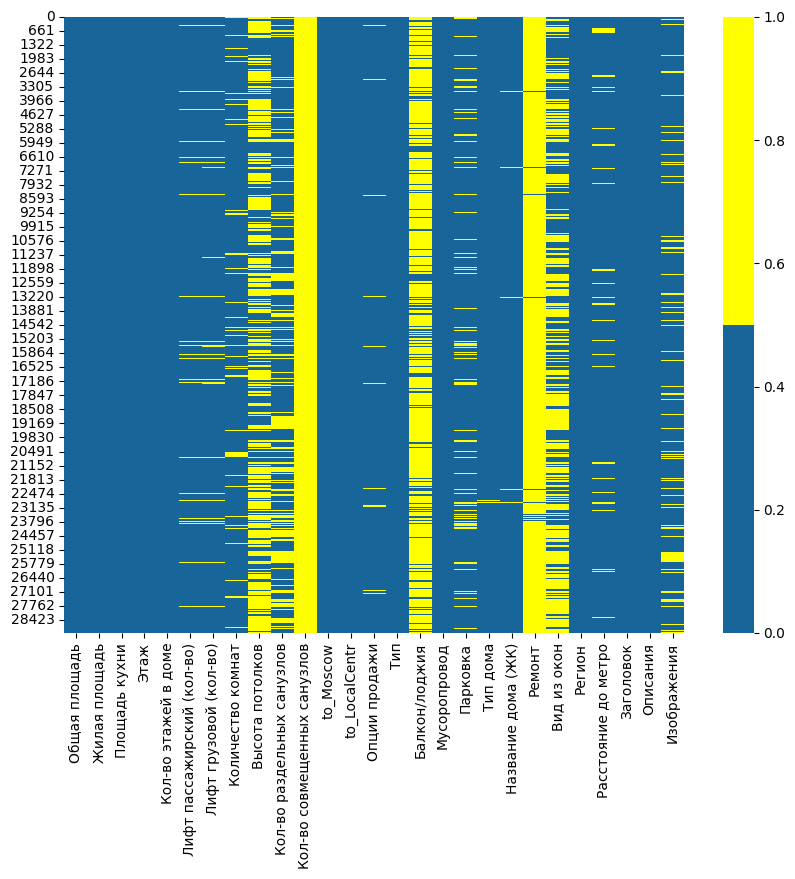

In [16]:
plt.figure(figsize=(10, 8))
colors = ['#186699', '#ffff00']
sns.heatmap(df_train[continuous + categorical + for_revue].isnull(), cmap=sns.color_palette(colors))

We can see a lot of miss data in columns: 'Высота потолков', 'Кол-во раздельных санузлов', 'Кол-во совмещенных санузлов', 'Балкон/лоджия', 'Ремонт', 'Вид из окон'

We should exclude them from our model because this parameters will do not give us relative information

In [17]:
continuous.remove('Высота потолков')
continuous.remove('Кол-во раздельных санузлов')
continuous.remove('Кол-во совмещенных санузлов')
categorical.remove('Балкон/лоджия')
categorical.remove('Ремонт')
categorical.remove('Вид из окон')

In [18]:
continuous

['Общая площадь',
 'Жилая площадь',
 'Площадь кухни',
 'Этаж',
 'Кол-во этажей в доме',
 'Лифт пассажирский (кол-во)',
 'Лифт грузовой (кол-во)',
 'Количество комнат',
 'to_Moscow',
 'to_LocalCentr']

#### Analysis of continuous data

<Axes: >

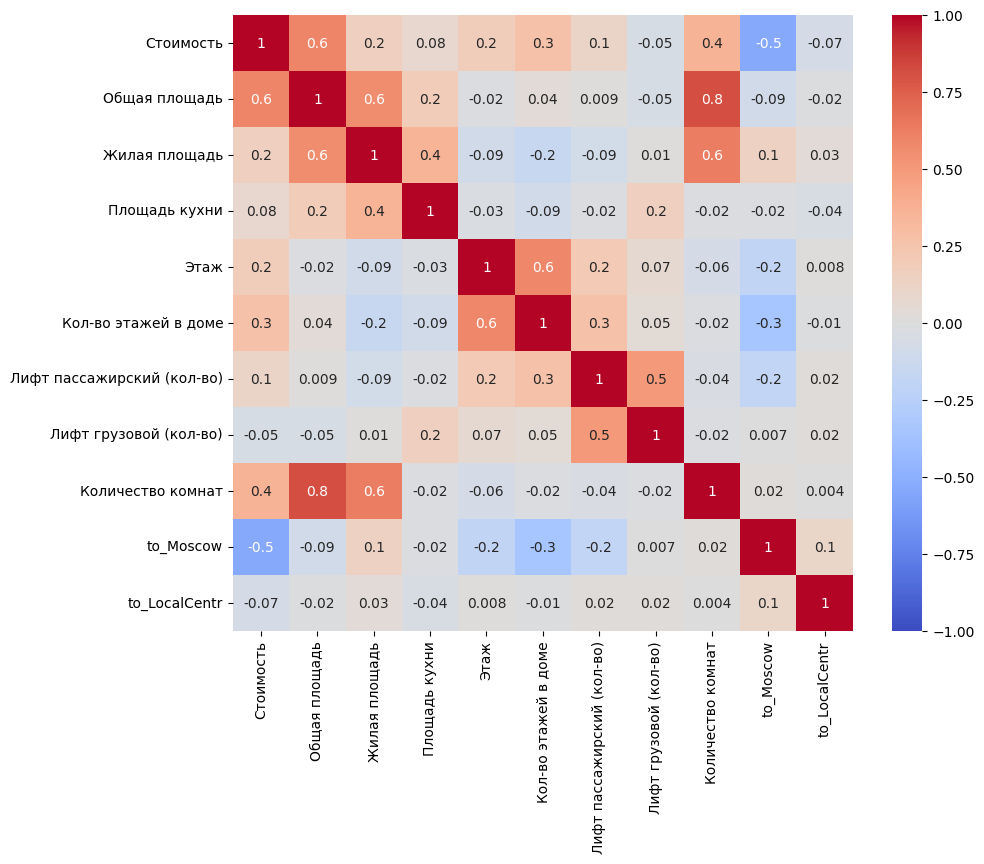

In [19]:
plt.figure(figsize=(10, 8))
cor = df_train[target + continuous].corr()
sns.heatmap(cor, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt='.1g')

You can notice that all the parameters depending on the area will cause multicollinearity, so you will have to leave only one of them in the model, the total area correlates with the price best of all, then we subtract it and throw it out 'Жилая площадь', 'Площадь кухни', 'Количество комнат'

Also there is multicollinearity in amount of different types of elevator so instead of different types we i used sum of types of elevator, but result of corelation was lover than just passenger elevator, so i will left just amount of passenger elevators

In [20]:
continuous.remove('Жилая площадь')
continuous.remove('Площадь кухни')
continuous.remove('Количество комнат')
continuous.remove('Лифт грузовой (кол-во)')

let's look at the outliers in the data

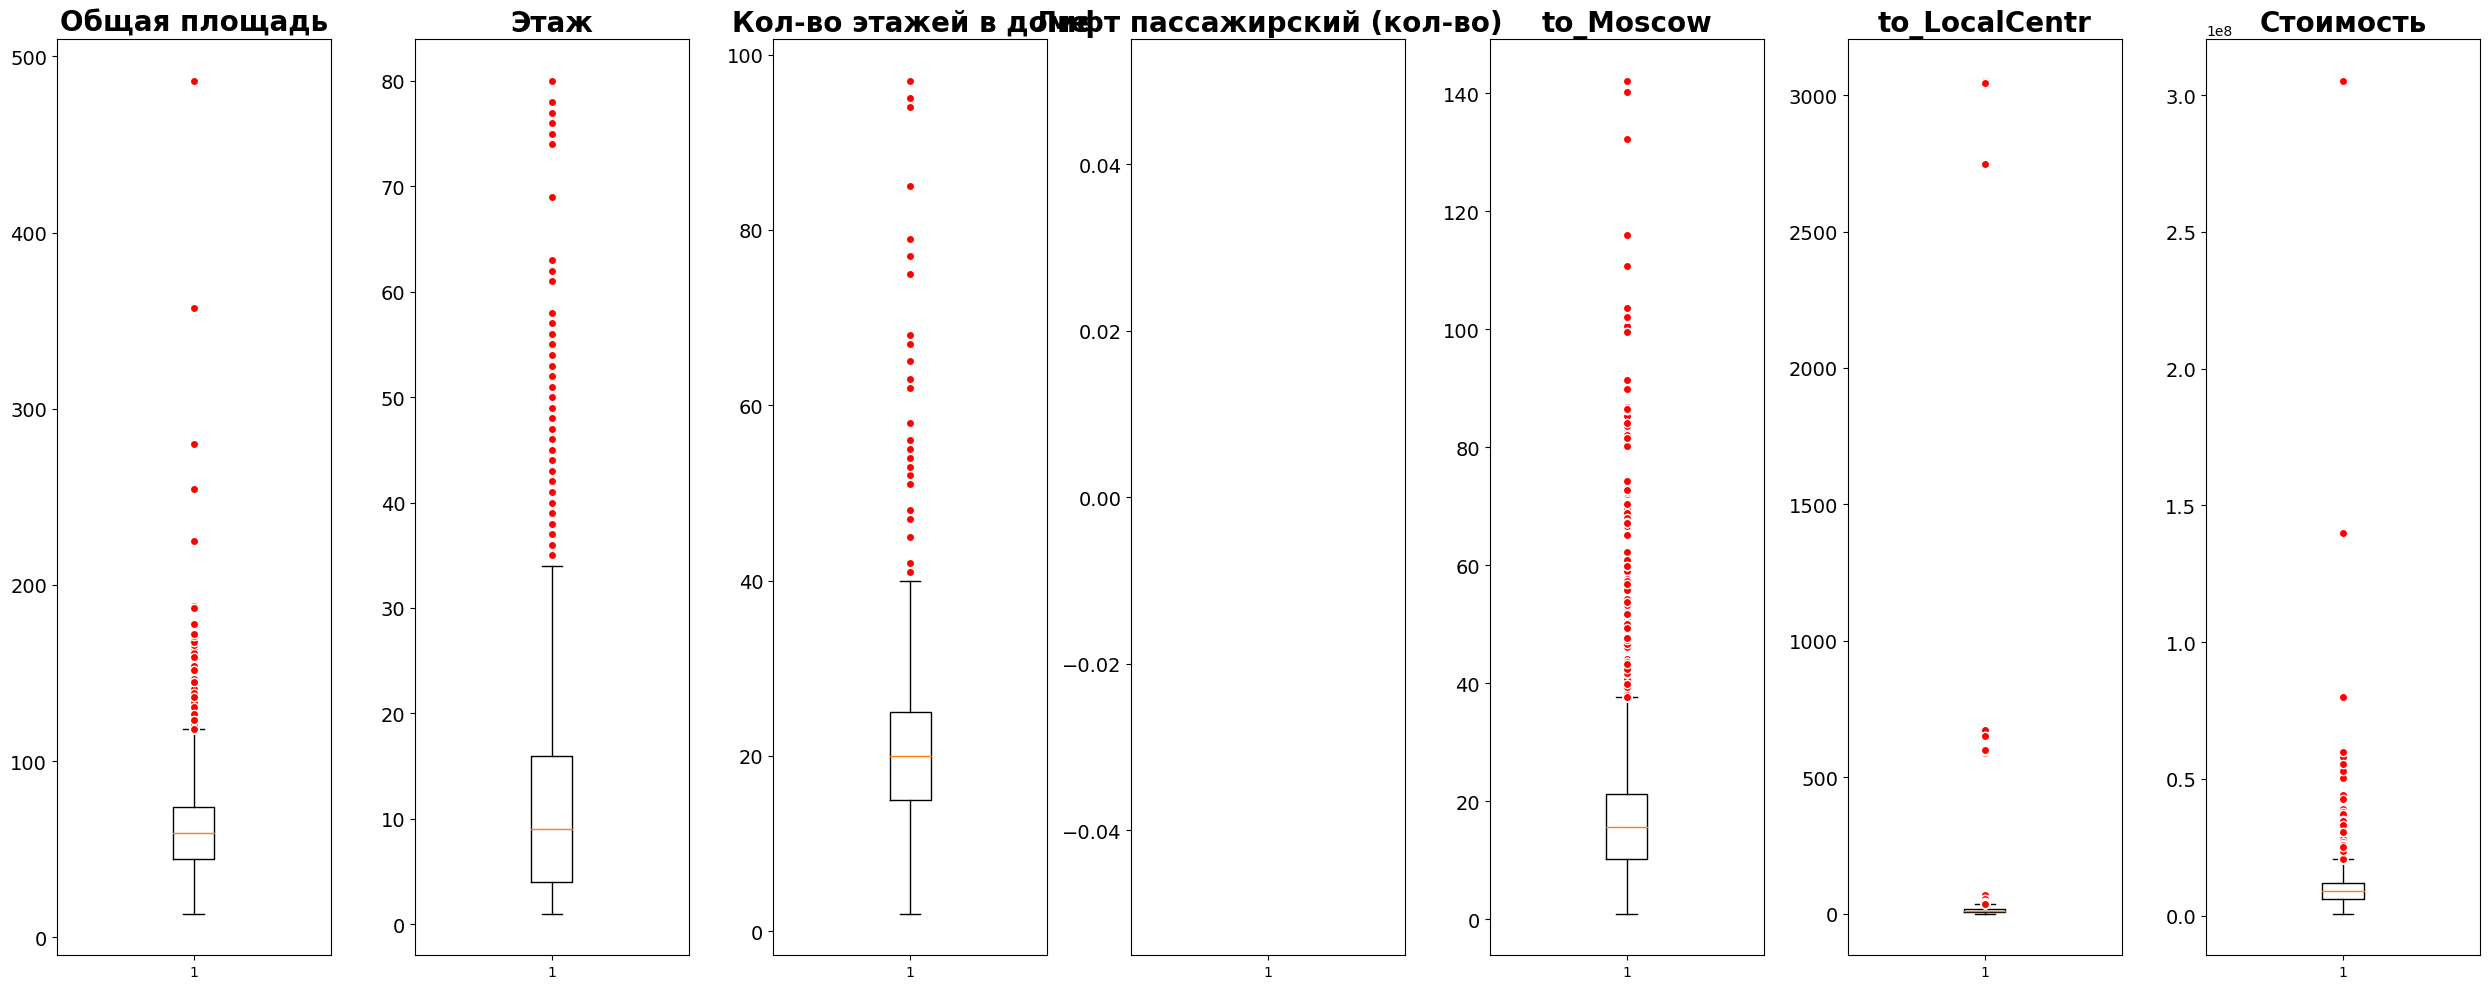

In [21]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
tmp = df_train[continuous + target]
fig, axs = plt.subplots(1, len(tmp.columns), figsize=(25,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(tmp.iloc[:,i], flierprops=red_circle)
    ax.set_title(tmp.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

there are quite a lot of outliers in the data, but they cannot be deleted due to the specifics of the data

let's look at the dependencies in the data

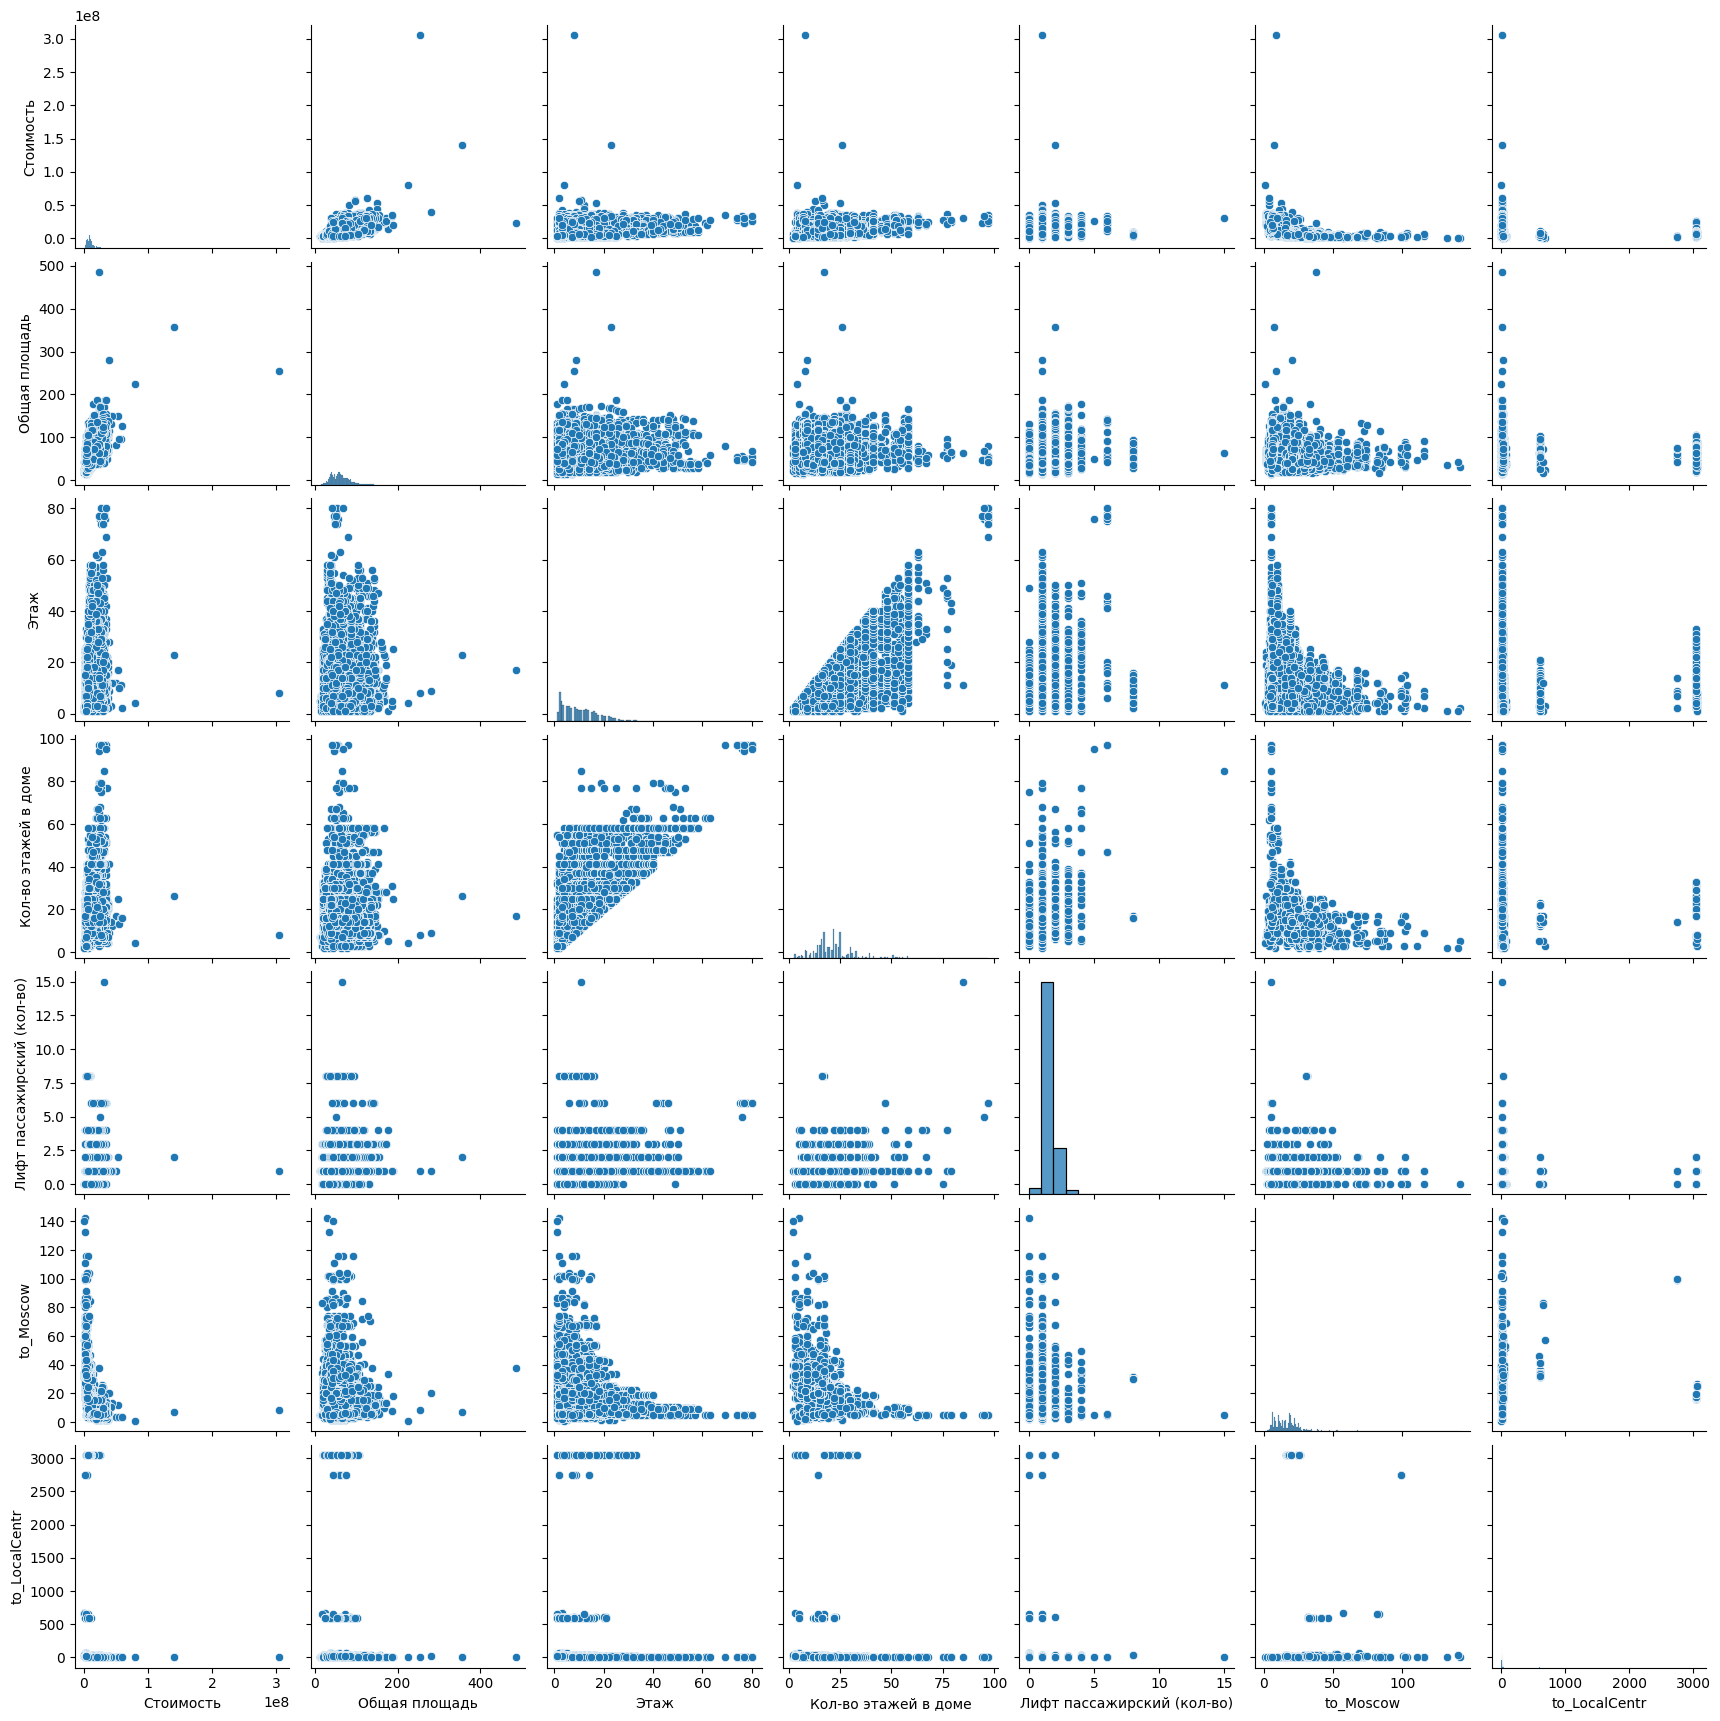

In [22]:
sns.pairplot(df_train[target + continuous])

linear dependence is observed for the area and distance to Moscow to the price

Cope with null data

In [23]:
df_train[continuous + target].isnull().sum()

Общая площадь                    0
Этаж                             0
Кол-во этажей в доме             0
Лифт пассажирский (кол-во)    1096
to_Moscow                        0
to_LocalCentr                    0
Стоимость                        0
dtype: int64

In [24]:
df_train['Лифт пассажирский (кол-во)'].mean()

1.2066337483898668

In [25]:
df_train['Лифт пассажирский (кол-во)'] = df_train['Лифт пассажирский (кол-во)'].fillna(1)

In [26]:
df_test['Лифт пассажирский (кол-во)'] = df_test['Лифт пассажирский (кол-во)'].fillna(1)

#### Analysis of categorical data

In [27]:
df_train[categorical].describe()

,Опции продажи,Тип,Мусоропровод,Парковка,Тип дома,Название дома (ЖК),Регион
count,28584,29044,29044,25806,28827,28841,29044
unique,7,2,2,3,5,580,57
top,"Долевое участие (214-ФЗ), Возможна ипотека",Новостройка,Нет,подземная,Монолитный,ЖК «Хорошевский»,Москва
freq,22208,28655,28884,12427,25788,1158,20462


Column Регион is already partly used in range to Moscow centr column, and it have to many unique values it is better to do not encode it and use it

Column Название дома (ЖК) have to many unique it is inefficient to code it

For other we will use One-hot encoding for higher efficiency 

In [28]:
categorical.remove('Название дома (ЖК)')
categorical.remove('Регион')

In [29]:
df_train_dummies = pd.get_dummies(df_train[categorical])
df_train_dummies.head()

,Опции продажи_Альтернатива,"Опции продажи_Альтернатива, Возможна ипотека",Опции продажи_Возможна ипотека,Опции продажи_Долевое участие (214-ФЗ),"Опции продажи_Долевое участие (214-ФЗ), Возможна ипотека",Опции продажи_Свободная продажа,"Опции продажи_Свободная продажа, Возможна ипотека",Тип_Вторичка,Тип_Новостройка,Мусоропровод_Да,Мусоропровод_Нет,Парковка_Наземная,Парковка_Неизвестно,Парковка_подземная,Тип дома_Кирпичный,Тип дома_Монолитно-кирпичный,Тип дома_Монолитный,Тип дома_Панельный,Тип дома_Сталинский
0,False,False,True,False,False,False,False,False,True,True,False,False,False,True,False,False,True,False,False
1,False,False,True,False,False,False,False,False,True,True,False,False,False,True,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False
3,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False
4,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False


In [30]:
tmp = {}
for i in df_train_dummies.columns:
    tmp[i] = [False for i in range(df_test.shape[0])]

In [31]:
j = 0
for index, row in df_test.iterrows():
    if str(row['Опции продажи']) != "nan":
        tmp[f"Опции продажи_{row['Опции продажи']}"][j] = True
    if str(row['Тип']) != "nan":
        tmp[f"Тип_{row['Тип']}"][j] = True
    if str(row['Мусоропровод']) != "nan":
        tmp[f"Мусоропровод_{row['Мусоропровод']}"][j] = True
    if str(row['Парковка']) != "nan":
        tmp[f"Парковка_{row['Парковка']}"][j] = True
    if str(row['Тип дома']) != "nan":
        tmp[f"Тип дома_{row['Тип дома']}"][j] = True
    j += 1
df_test_dummies = pd.DataFrame()
for i in tmp:
    df_test_dummies[i] = tmp[i]
df_test_dummies.head()

,Опции продажи_Альтернатива,"Опции продажи_Альтернатива, Возможна ипотека",Опции продажи_Возможна ипотека,Опции продажи_Долевое участие (214-ФЗ),"Опции продажи_Долевое участие (214-ФЗ), Возможна ипотека",Опции продажи_Свободная продажа,"Опции продажи_Свободная продажа, Возможна ипотека",Тип_Вторичка,Тип_Новостройка,Мусоропровод_Да,Мусоропровод_Нет,Парковка_Наземная,Парковка_Неизвестно,Парковка_подземная,Тип дома_Кирпичный,Тип дома_Монолитно-кирпичный,Тип дома_Монолитный,Тип дома_Панельный,Тип дома_Сталинский
0,False,False,False,False,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False
3,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False


#### Analysis of data for revue and posable changes

In [32]:
df_train[for_revue].describe()

,Расстояние до метро,Заголовок,Описания,Изображения
count,27261,29044,29044,25581
unique,126,6244,20651,25581
top,2 мин. на транспорте,"1-комн. квартира, 46.8 м2",О жилом комплексе. Новый проект бизнес-класса ...,https://cdn-p.cian.site/images/3/824/736/novos...
freq,4501,128,326,1


Column Расстояние до метро have not a lot of unique values we can try to convert it to continuous variable, what time you need to spend on legs to get to metro, by assuming that transport usually faster 10 times than walking

In [33]:
continuous.append('to_Metro')

In [34]:
to_Metro  = []
for index, row in df_train.iterrows():
    if str(row['Расстояние до метро']) != "nan":
        s = str(row['Расстояние до метро'])
        s = s.split()
        if s[-1] == "транспорте":
            to_Metro.append(int(s[0]) * 10)
        else:
            to_Metro.append(int(s[0]))
    else:
        to_Metro.append(None)
df_train['to_Metro'] = to_Metro
df_train['to_Metro'] = df_train['to_Metro'].fillna(df_train['to_Metro'].mean())

In [35]:
to_Metro  = []
for index, row in df_test.iterrows():
    if str(row['Расстояние до метро']) != "nan":
        s = str(row['Расстояние до метро'])
        s = s.split()
        if s[-1] == "транспорте":
            to_Metro.append(int(s[0]) * 10)
        else:
            to_Metro.append(int(s[0]))
    else:
        to_Metro.append(None)
df_test['to_Metro'] = to_Metro
df_test['to_Metro'] = df_test['to_Metro'].fillna(df_test['to_Metro'].mean())

### Gradient boosting

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df_train[continuous].join(df_train_dummies)
y = df_train['Стоимость']
X_test_submit = df_test[continuous].join(df_test_dummies)
scaler = StandardScaler()
X[continuous] = scaler.fit_transform(X[continuous])
scaler = StandardScaler()
X_test_submit[continuous] = scaler.fit_transform(X_test_submit[continuous])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor(n_estimators=100000, learning_rate=0.001, tree_method='gpu_hist', eval_metric='rmsle')
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_log_error
from math import sqrt

sqrt(mean_squared_log_error(y_test, predictions))

0.08267688900709971

In [39]:
predictions_submit = xgb.predict(X_test_submit)
df_sample_submission['Стоимость'] = predictions_submit
df_sample_submission.to_csv("result.csv", index=False)

### Linear regression model

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(
    [
        ('ln', LinearRegression()),
    ]
)

In [41]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('ln', LinearRegression())])

In [42]:
from sklearn.metrics import mean_squared_log_error
from math import sqrt


res = pipeline.predict(X_test)
a = res.mean()
for i in range(len(res)):
    if res[i] < 0:
        res[i] = a

sqrt(mean_squared_log_error(y_test, predictions))

0.08267688900709971

In [43]:
res = pipeline.predict(X_test_submit)
for i in range(len(res)):
    if res[i] < 0:
        res[i] = res.mean()
df_sample_submission['Стоимость'] = res
df_sample_submission.to_csv("result.csv", index=False)

### Submit results  

Best result with gradient boosting so let's upload it

In [44]:
predictions_submit = xgb.predict(X_test_submit)
df_sample_submission['Стоимость'] = predictions_submit
df_sample_submission.to_csv("result.csv", index=False)

In [45]:
! kaggle competitions submit -c hse-gsb-apartment-price-prediction -f result.csv -m "result"

Successfully submitted to HSE GSB. Apartment price prediction



  0%|          | 0.00/173k [00:00<?, ?B/s]
100%|██████████| 173k/173k [00:00<00:00, 1.51MB/s]
100%|██████████| 173k/173k [00:01<00:00, 116kB/s] 
